<a href="https://colab.research.google.com/github/sheshank1436/GANS/blob/master/GAN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.optim as opt
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mb_size = 64
#converting to tensor
transform = transforms.ToTensor()
#downloading the training data of Mnist dataset
trainData = torchvision.datasets.MNIST('./data/', download=True, transform=transform, train=True)
#we need dataloader to load the data
trainLoader = torch.utils.data.DataLoader(trainData, shuffle=True, batch_size=mb_size)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
 dataIter = iter(trainLoader)

imgs, labels = dataIter.next()

In [5]:
imgs.shape

torch.Size([64, 1, 28, 28])

when you load the data using a dataloader, the data will be in the form of tensors in order to visualize the images we need to first convert the tensors into numpy array

In [6]:
img=imgs.numpy()
img.shape

(64, 1, 28, 28)

In [7]:
#if you want to see how transpose works
#a=np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
#print(a)
#np.transpose(a, (1,2,0))

In [8]:
def imshow(imgs):
    imgs = torchvision.utils.make_grid(imgs)
    npimgs = imgs.numpy()
    plt.figure(figsize=(8,8))
    plt.imshow(np.transpose(npimgs, (1,2,0)), cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])
    plt.show()

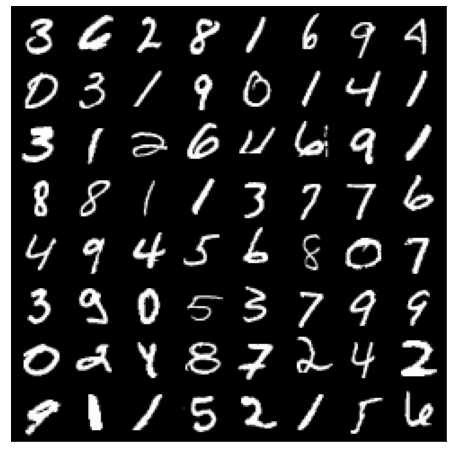

In [9]:
imshow(imgs)

In [10]:
#imgs.view(imgs.size(0), -1).size(1)

In [11]:
#size(dimension) of the input noise vector which we pass to the generator
Z_dim = 100
#dimenions of hidden layers
H_dim = 128
#this is the  ouput dimensions of the generator network 
#since the mnist data images have shape of 28*28
X_dim = imgs.view(imgs.size(0), -1).size(1)

print(Z_dim, H_dim, X_dim)

device = 'cuda'


100 128 784


we use nn.Module is used in pytorch because it is a builtin lib to  keep track of its trainable parameters, you can swap it between CPU and GPU with the .to(device) method, where device can be a CPU device torch. device("cpu") or CUDA device torch.


Using these values, the generator will build a neural network with 1 layer/blocks. Beginning with the noise vector, the generator will apply non-linear transformations via the block function until the tensor is mapped to the size of the image to be outputted (the same size as the real images from MNIST). You will need to fill in the code for final layer since it is different than the others. The final layer does not need a normalization or activation function, but does need to be scaled with a sigmoid function.

Finally, you are given a forward pass function that takes in a noise vector and generates an image of the output dimension using your neural network.

In [12]:
class Gen(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(Z_dim, H_dim),
            nn.ReLU(),
            nn.Linear(H_dim, X_dim),
            nn.Sigmoid()
        )
          
    def forward(self, input):
        return self.model(input)

In [13]:
G = Gen().to(device)

The second component that you need to construct is the discriminator. As with the generator component, you will start by creating a function that builds a neural network block for the discriminator.

In [14]:
class Dis(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(X_dim, H_dim),
            nn.ReLU(),
            nn.Linear(H_dim, 1),
            nn.Sigmoid()
        )
        
    def forward(self, input):
        return self.model(input)

In [15]:
D = Dis().to(device)

In [16]:
print(G)
print(D)


Gen(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=784, bias=True)
    (3): Sigmoid()
  )
)
Dis(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


#Initialize optimizers for generator and discriminator

In [17]:
lr = 1e-3

g_opt = opt.Adam(G.parameters(), lr=lr)
d_opt = opt.Adam(D.parameters(), lr=lr)

In [27]:
#to know how view works
#t = torch.rand(4, 4)
#print(t.shape)
#b = t.view(2, -1)
#print(b.shape)

In [23]:
for epoch in range(20):
    G_loss_run = 0.0
    D_loss_run = 0.0
    for i, data in enumerate(trainLoader):
        X, _ = data
        print('a',X.shape)
        X = X.view(X.size(0), -1).to(device)
        print(X.shape)
        mb_size = X.size(0)
        print(mb_size)
        break

a torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
64
a torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
64
a torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
64
a torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
64
a torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
64
a torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
64
a torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
64
a torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
64
a torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
64
a torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
64
a torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
64
a torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
64
a torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
64
a torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
64
a torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
64
a torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
64
a torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
64
a torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
64
a torch.Si

- epochs: the number of times you iterate through the entire dataset when trainingx.


Epoch:0,   G_loss:4.642705266028325,    D_loss:0.0755805506205647


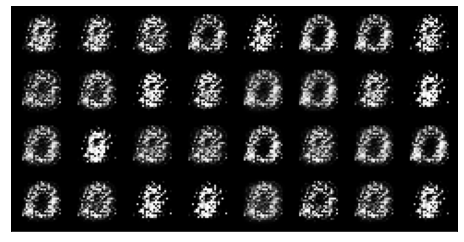

Epoch:1,   G_loss:3.983957106624839,    D_loss:0.0681772149517449


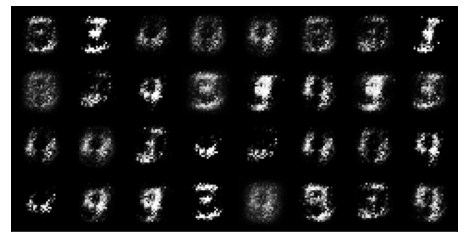

Epoch:2,   G_loss:4.032725245713679,    D_loss:0.09687668727393121


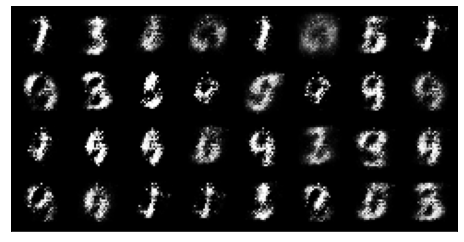

Epoch:3,   G_loss:3.962517815358095,    D_loss:0.13780970765011652


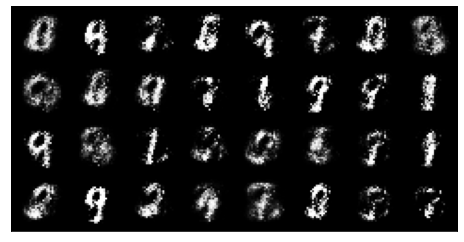

Epoch:4,   G_loss:3.511027503623637,    D_loss:0.19925408878687348


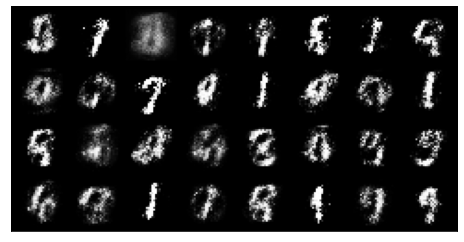

Epoch:5,   G_loss:3.2310612460951815,    D_loss:0.2838219437104807


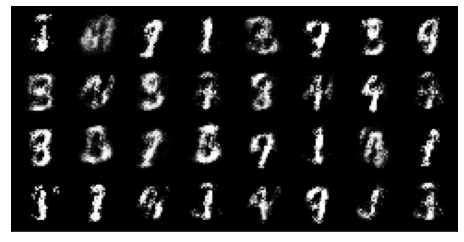

Epoch:6,   G_loss:2.839079728385787,    D_loss:0.35147537916167965


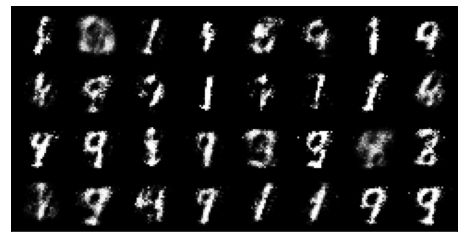

Epoch:7,   G_loss:2.5077819275195155,    D_loss:0.3789458477865658


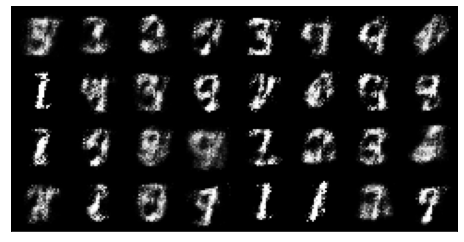

Epoch:8,   G_loss:2.4711899917517135,    D_loss:0.3876287855668617


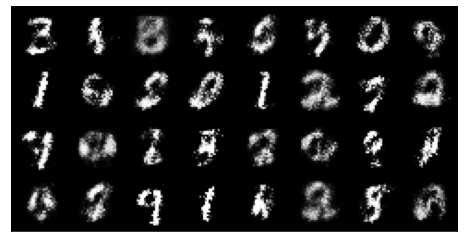

Epoch:9,   G_loss:2.405212773824297,    D_loss:0.4465729362611323


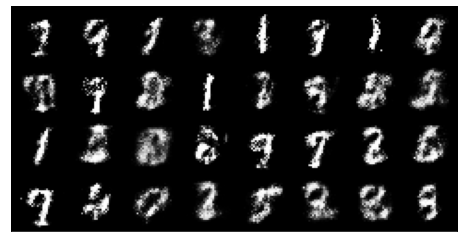

Epoch:10,   G_loss:2.4040041067707003,    D_loss:0.456562101856859


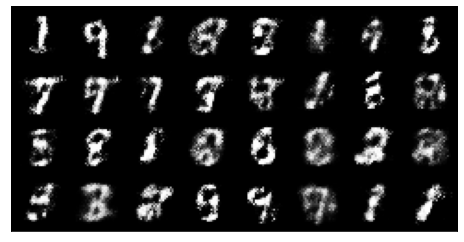

Epoch:11,   G_loss:2.1459709749038796,    D_loss:0.45728201473127805


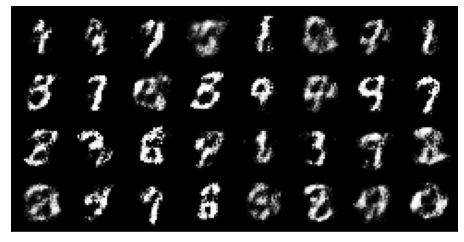

Epoch:12,   G_loss:2.097627929405871,    D_loss:0.4392869893961878


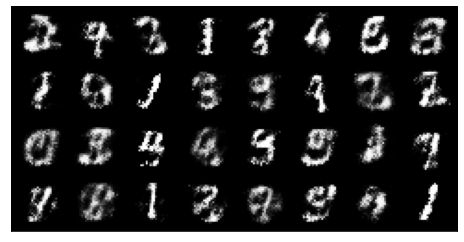

Epoch:13,   G_loss:1.9946539898925244,    D_loss:0.45323634611518143


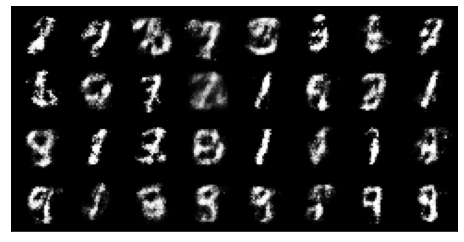

Epoch:14,   G_loss:1.930017622167876,    D_loss:0.45340979953945826


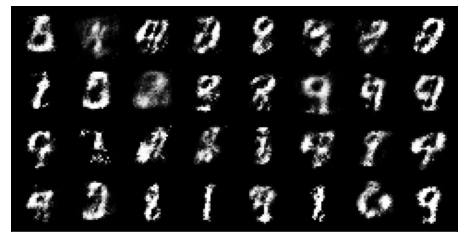

Epoch:15,   G_loss:1.8774327480716746,    D_loss:0.45574526758844663


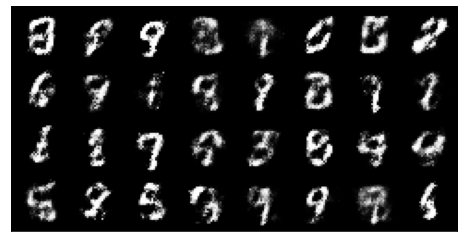

Epoch:16,   G_loss:1.7918218994445638,    D_loss:0.44708677622745796


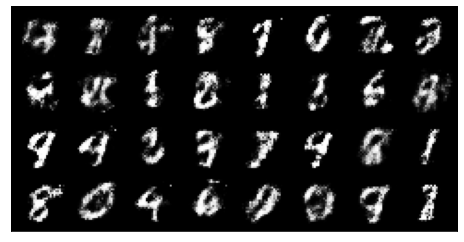

Epoch:17,   G_loss:1.8441487628259638,    D_loss:0.43788314520168914


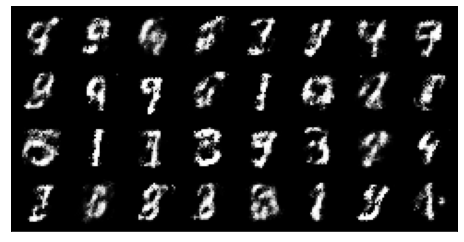

Epoch:18,   G_loss:1.8837576502167594,    D_loss:0.43023686428695346


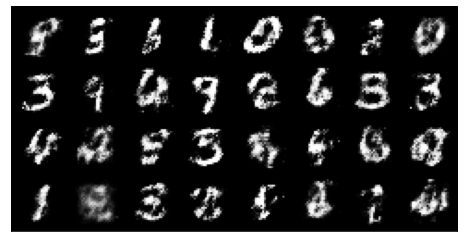

Epoch:19,   G_loss:1.850301961781882,    D_loss:0.4329818953106652


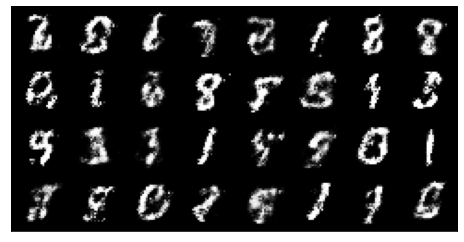

In [18]:
for epoch in range(20):
    G_loss_run = 0.0
    D_loss_run = 0.0
    #iterate through each batch of dataset using forloop for every epoch
    for i, data in enumerate(trainLoader):
        #storing the batch features and labels in X,_
        X, _ = data
        X = X.view(X.size(0), -1).to(device)
        #below is the batch size we need to keep track of it because suppose we have 10 images in our dataset
        ##our batch size is 3 so in the last batch we have only 1 image 
        mb_size = X.size(0)
        #intialize one and zero labels
        one_labels = torch.ones(mb_size, 1).to(device)
        zero_labels = torch.zeros(mb_size, 1).to(device)
        #generating feedbacks for discriminator
        #randomly create a noise vector having dimensions(batchsize,input size to generator)
        z = torch.randn(mb_size, Z_dim).to(device)
        #generate predictions for real images using the discriminator
        D_real = D(X)
        #generate the fake images with generator using the noise vector as input
        #Get the discriminator's prediction of the fake image.
        D_fake = D(G(z))
        #calculate the loss of real images comparing with one_labels
        D_real_loss = F.binary_cross_entropy(D_real, one_labels)
        #calculate the loss of fake images comparing with zero_labels
        D_fake_loss = F.binary_cross_entropy(D_fake, zero_labels)
        #average the total loss
        D_loss = (D_real_loss + D_fake_loss)/2
        #make the gradients zero
        d_opt.zero_grad()
        D_loss.backward()
        #update the gradients
        d_opt.step()


        #feedback for generator
        #randomly create a noise vector having dimensions(batchsize,input size to generator)
        z = torch.randn(mb_size, Z_dim).to(device)
        #generate the fake images with generator using the noise vector as input
        #Get the discriminator's prediction of the fake image.
        D_fake = D(G(z))
        #calculate the loss of fake images comparing with one_labels
        #here we use one_labels because we need to make the fake images as real as possible and bring gen values close to 1
        G_loss = F.binary_cross_entropy(D_fake, one_labels)
        
        g_opt.zero_grad()
        G_loss.backward()
        g_opt.step()
        #update losses
        #The item() method extracts the loss’s value as a Python float
        G_loss_run += G_loss.item()
        D_loss_run += D_loss.item()
        
    print('Epoch:{},   G_loss:{},    D_loss:{}'.format(epoch, G_loss_run/(i+1), D_loss_run/(i+1)))
    
    samples = G(z).detach()
    samples = samples.view(samples.size(0), 1, 28, 28).cpu()
    imshow(samples)